In [1]:
import astropy.units as u
from astropy.constants import G as _G
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gary.units import galactic
import gary.potential as gp

import biff
G = _G.decompose(galactic).value
from pygadgetreader import *
from octopus import profiles
from astropy import constants
from astropy import units as u

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
G_c = constants.G
G_c = G_c.to(u.kiloparsec**3 / (u.s**2 * u.Msun)) # 
print G_c

4.51835939627e-39 kpc3 / (s2 solMass)


# To-do
1. Check 1.4 factor in the potential!
2. Play with more coefficients in $n, l, m$
3. Make 2d plots
4. Compare the value of the potential at a given positions

## To take into account:
1. The mass of the MW
2. The scale length
3. The potential units.

In [3]:
# Simulated data:

MW = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'pos', 'dm')
MW_mass = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'mass', 'dm')
MW_pot = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'pot', 'dm')

MWLMCi = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
MWLMCi_mass = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'mass', 'dm')
MWLMCi_pot = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pot', 'dm')

MWLMCf = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pos', 'dm')
MWLMCf_mass = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'mass', 'dm')
MWLMCf_pot = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pot', 'dm')




Returning DM    Positions
Returning DM    Mass
Returning DM    Potential
Returning DM    Positions
Returning DM    Mass
Returning DM    Potential
Returning DM    Positions
Returning DM    Mass
Returning DM    Potential


In [4]:
# Truncated the halo a larger distances
trunc1 = np.where(np.sqrt((MW[:,0])**2.0 + (MW[:,1])**2.0 + (MW[:,2])**2.0)<500)[0]
trunc2 = np.where(np.sqrt((MWLMCi[:,0])**2.0 + (MWLMCi[:,1])**2.0 + (MWLMCi[:,2])**2.0)<500)[0]
trunc3 = np.where(np.sqrt((MWLMCf[:,0])**2.0 + (MWLMCf[:,1])**2.0 + (MWLMCf[:,2])**2.0)<500)[0]

In [5]:
MW_t = MW[trunc1]
MW_mass_t = MW_mass[trunc1]
MW_pot_t = MW_pot[trunc1]


MWLMCi_t = MWLMCi[trunc2]
MWLMCi_mass_t = MWLMCi_mass[trunc2]
MWLMCi_pot_t = MWLMCi_pot[trunc2]


MWLMCf_t = MWLMCf[trunc3]
MWLMCf_mass_t = MWLMCf_mass[trunc3]
MWLMCf_pot_t = MWLMCf_pot[trunc3]


In [6]:
def STnlm(xyz, mass, rs, n_max, l_max):
    nmax = n_max
    lmax = l_max

    Snlm = np.zeros((nmax+1,lmax+1,lmax+1))
    Tnlm = np.zeros((nmax+1,lmax+1,lmax+1))

    nlms = []

    for n in range(nmax+1):
        for l in range(lmax+1):
            for m in range(l+1):
                nlms.append([n,l,m])

    for nlm in nlms:
        n,l,m = nlm
        S,T = biff.compute_coeffs_discrete(np.double(xyz), np.double(mass/100.0), nlm, rs)
        Snlm[n,l,m] = S
        Tnlm[n,l,m] = T
    return Snlm, Tnlm, nlms

# MW isolated halo (Hernquist)

In [7]:
## MW isolated halo 1 term in N

SMW1, TMW1, nlmsMW1 = STnlm(MW_t, MW_mass_t, 40.3, 1, 0)
MWbfe_pot = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW1, TMW1, 1, 0, 1, 1.35E12, 40.85)
MWbfe_rho = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW1, TMW1, 1, 0, 1.35E12, 40.85)


In [8]:
r_MW_t = np.sqrt(MW_t[:,0]**2.0 + MW_t[:,1]**2.0 + MW_t[:,2]**2.0)
rho_teo = profiles.dens_hernquist(40.85, r_MW_t, 1.35E12) 

In [9]:
## MW isolated halo 10 term in N

SMW2, TMW2, nlmsMW2 = STnlm(MW_t, MW_mass_t, 40.3, 10, 0)
MWbfe_pot2 = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW2, TMW2, 10, 0, 1, 1.35E12, 40.85)
MWbfe_rho2 = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW2, TMW2, 10, 0, 1.35E12, 40.85)

In [10]:
## MW isolated halo 20 term in N

SMW3, TMW3, nlmsMW3 = STnlm(MW_t, MW_mass_t, 40.3, 20, 0)
MWbfe_pot3 = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW3, TMW3, 20, 0, 1, 1.35E12, 40.85)
MWbfe_rho3 = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW3, TMW3, 20, 0, 1.35E12, 40.85)

In [11]:
## MW isolated halo 5 term in Nmax and 5 in lmax

SMW4, TMW4, nlmsMW4 = STnlm(MW_t, MW_mass_t, 40.3, 5, 5)
MWbfe_pot4 = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW4, TMW4, 5, 5, 1, 1.35E12, 40.85)
MWbfe_rho4 = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW4, TMW4, 5, 5, 1.35E12, 40.85)

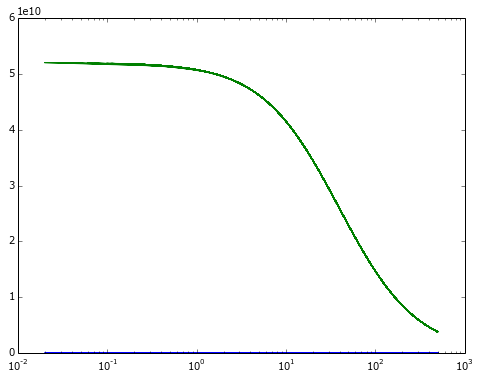

In [172]:
plt.figure(figsize=(8,6))
plt.semilogx(r_MW_t, np.abs(MW_pot_t), label='$N-body$')
plt.semilogx(r_MW_t, np.abs(MWbfe_pot), label='$n_{max} = 1$')

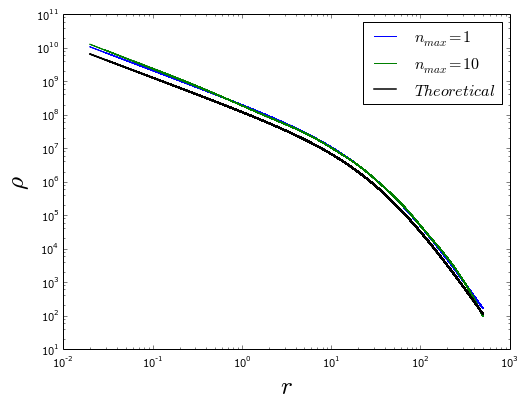

In [15]:
plt.figure(figsize=(8,6))
plt.loglog(r_MW_t, MWbfe_rho, label='$n_{max} = 1$')
plt.loglog(r_MW_t, MWbfe_rho2, label='$n_{max} = 10$')
#plt.loglog(r_MW_t, MWbfe_rho3, label='$n_{max} = 20$')
#plt.loglog(r_MW_t, MWbfe_rho4, label='$n_{max} = 5,\ l_{max}=5$')
plt.loglog(r_MW_t, rho_teo, label='$Theoretical$', lw=1.5, c='k')
plt.legend(fontsize=16, loc='best')
plt.xlabel(r'$r$', fontsize=25)
plt.ylabel(r'$\rho$', fontsize=25)
## There is a factor here!

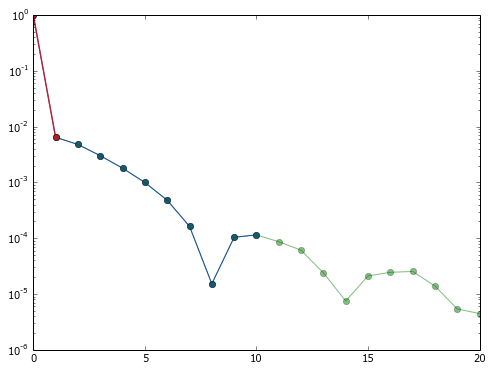

In [14]:
plt.figure(figsize=(8,6))
plt.semilogy(np.array(nlmsMW2)[:,0], np.abs(SMW2.flat/SMW2[0,0,0])[:], marker='o', c='b', alpha=0.8)
plt.semilogy(np.array(nlmsMW3)[:,0], np.abs(SMW3.flat/SMW3[0,0,0])[:], marker='o', c='g', alpha=0.5)
plt.semilogy(np.array(nlmsMW1)[:,0], np.abs(SMW1.flat/SMW1[0,0,0])[:], marker='o', c='r', lw=1.5, alpha=0.6)

#plt.xlim(0,30)
#plt.ylim(1E-6, 1.0)

# MW + LMC initial state

In [29]:
SMWLMCi1, TMWLMCi1, nlmsMWLMCi1 = STnlm(MWLMCi_t, MWLMCi_mass_t, 40.3, 1, 0)

MWLMCbfe_pot = biff.potential(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi1, TMWLMCi1, 1, 0, 1, 1.35E12, 40.85)
MWLMCbfe_rho = biff.density(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi1, TMWLMCi1, 1, 0, 1.35E12, 40.85)

In [30]:
SMWLMCi2, TMWLMCi2, nlmsMWLMCi2 = STnlm(MWLMCi_t, MWLMCi_mass_t, 40.3, 10, 0)

MWLMCbfe_pot2 = biff.potential(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi2, TMWLMCi2, 10, 0, 1, 1.35E12, 40.85)
MWLMCbfe_rho2 = biff.density(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi2, TMWLMCi2, 10, 0, 1.35E12, 40.85)

In [31]:
SMWLMCi3, TMWLMCi3, nlmsMWLMCi3 = STnlm(MWLMCi_t, MWLMCi_mass_t, 40.3, 20, 0)

MWLMCbfe_pot3 = biff.potential(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi3, TMWLMCi3, 20, 0, 1, 1.35E12, 40.85)
MWLMCbfe_rho3 = biff.density(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi3, TMWLMCi3, 20, 0, 1.35E12, 40.85)

In [22]:
r_MWLMCi_t = np.sqrt(MWLMCi_t[:,0]**2.0 + MWLMCi_t[:,1]**2.0 + MWLMCi_t[:,2]**2.0)


In [58]:
SMWLMCi4, TMWLMCi4, nlmsMWLMCi4 = STnlm(MWLMCi_t, MWLMCi_mass_t, 40.3, 5, 5)



In [59]:
MWLMCbfe_pot4 = biff.potential(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi4, TMWLMCi4, 5, 5, 1, 1.35E12, 40.85)
#MWLMCbfe_rho4 = biff.density(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi4, TMWLMCi4, 20, 5, 1.35E12, 40.85)

In [ ]:
SMWLMCi5, TMWLMCi5, nlmsMWLMCi5 = STnlm(MWLMCi_t, MWLMCi_mass_t, 40.3, 10, 10)
MWLMCbfe_pot5 = biff.potential(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi5, TMWLMCi5, 10, 10, 1, 1.35E12, 40.85)


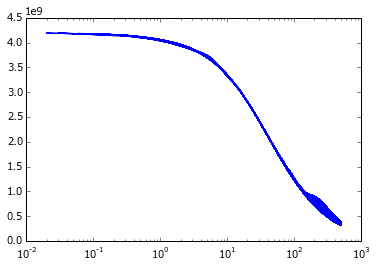

In [37]:
#plt.semilogx(r_MWLMCi_t, np.abs(MWLMCi_pot_t))
plt.semilogx(r_MWLMCi_t, np.abs(MWLMCbfe_pot4))

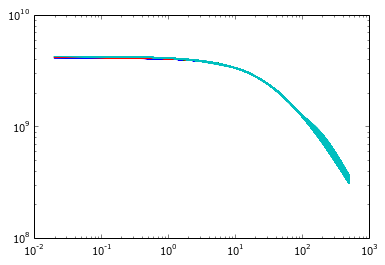

In [25]:
plt.loglog(r_MWLMCi_t, np.abs(MWLMCbfe_pot))
plt.loglog(r_MWLMCi_t, np.abs(MWLMCbfe_pot2))
plt.loglog(r_MWLMCi_t, np.abs(MWLMCbfe_pot3))
plt.loglog(r_MWLMCi_t, np.abs(MWLMCbfe_pot4))

In [ ]:
plt.figure(figsize=(8,6))
plt.loglog(r_MW_t, MWbfe_rho, label='$n_{max} = 1$')
plt.loglog(r_MW_t, MWbfe_rho2, label='$n_{max} = 10$')
plt.loglog(r_MW_t, MWbfe_rho3, label='$n_{max} = 20$')
plt.loglog(r_MW_t, rho_teo, label='$Theoretical$', lw=1.5, c='k')
plt.legend(fontsize=16, loc='best')
plt.xlabel(r'$r$', fontsize=25)
plt.ylabel(r'$\rho$', fontsize=25)

# MW + LMC final state

In [18]:
SMWLMCf1, TMWLMCf1, nlmsMWLMCf1 = STnlm(MWLMCf_t, MWLMCf_mass_t, 40.3, 1, 0)

MWLMCbfe_pot_f = biff.potential(np.ascontiguousarray(np.double(MWLMCf_t)), SMWLMCf1, TMWLMCf1, 1, 0, 1, 1.35E12, 40.85)
MWLMCbfe_rho_f = biff.density(np.ascontiguousarray(np.double(MWLMCf_t)), SMWLMCf1, TMWLMCf1, 1, 0, 1.35E12, 40.85)

In [19]:
SMWLMCf2, TMWLMCf2, nlmsMWLMCf2 = STnlm(MWLMCf_t, MWLMCf_mass_t, 40.3, 10, 0)

MWLMCbfe_pot_f2 = biff.potential(np.ascontiguousarray(np.double(MWLMCf_t)), SMWLMCf2, TMWLMCf2, 10, 0, 1, 1.35E12, 40.85)
MWLMCbfe_rho_f2 = biff.density(np.ascontiguousarray(np.double(MWLMCf_t)), SMWLMCf2, TMWLMCf2, 10, 0, 1.35E12, 40.85)

In [20]:
SMWLMCf3, TMWLMCf3, nlmsMWLMCf3 = STnlm(MWLMCf_t, MWLMCf_mass_t, 40.3, 20, 0)

MWLMCbfe_pot_f3 = biff.potential(np.ascontiguousarray(np.double(MWLMCf_t)), SMWLMCf3, TMWLMCf3, 20, 0, 1, 1.35E12, 40.85)
MWLMCbfe_rho_f3 = biff.density(np.ascontiguousarray(np.double(MWLMCf_t)), SMWLMCf3, TMWLMCf3, 20, 0, 1.35E12, 40.85)

In [53]:
SMWLMCf4, TMWLMCf4, nlmsMWLMCf4 = STnlm(MWLMCf_t, MWLMCf_mass_t, 40.3, 5, 5)

MWLMCbfe_pot_f4 = biff.potential(np.ascontiguousarray(np.double(MWLMCf_t)), SMWLMCf4, TMWLMCf4, 5, 5, 1, 1.35E12, 40.85)
MWLMCbfe_rho_f4 = biff.density(np.ascontiguousarray(np.double(MWLMCf_t)), SMWLMCf4, TMWLMCf4, 5, 5, 1.35E12, 40.85)

<matplotlib.colorbar.Colorbar instance at 0x7fdd5ab5aea8>

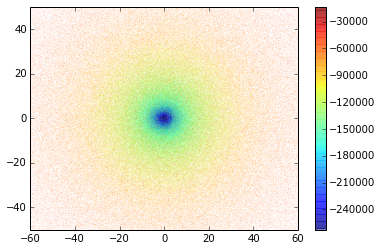

In [24]:
plt.scatter(MW_t[:,1], MW_t[:,2], s=0.1, edgecolors='none', c = MW_pot_t, alpha=0.5)
plt.axis('equal')
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fdd4e423710>

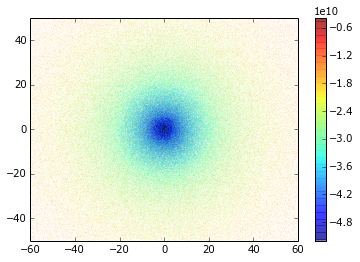

In [25]:
plt.scatter(MW_t[:,1], MW_t[:,2], s=0.1, edgecolors='none', c = MWbfe_pot, alpha=0.5)
plt.axis('equal')
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.colorbar()

In [42]:
MW_norm_pot = MW_pot_t/np.max(np.abs(MW_pot_t))
MWbfe_norm_pot1 = MWbfe_pot/np.max(np.abs(MWbfe_pot))
MWratio_pot1 = MW_norm_pot/MWbfe_norm_pot1

In [43]:
MWbfe_norm_pot2 = MWbfe_pot2/np.max(np.abs(MWbfe_pot2))
MWratio_pot2 = MW_norm_pot/MWbfe_norm_pot2

<matplotlib.colorbar.Colorbar instance at 0x7fdd476733b0>

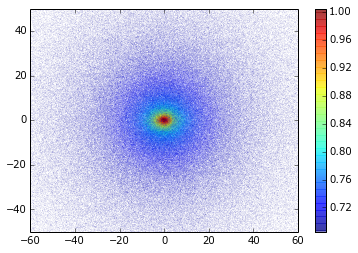

In [40]:
plt.scatter(MW_t[:,1], MW_t[:,2], s=0.1, edgecolors='none', c = MWratio_pot1, alpha=0.5)
plt.axis('equal')
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fdd4749ad88>

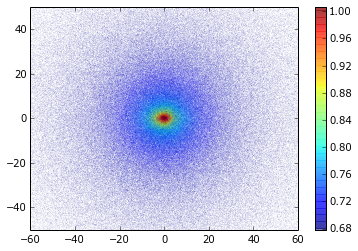

In [45]:
plt.scatter(MW_t[:,1], MW_t[:,2], s=0.1, edgecolors='none', c = MWratio_pot2, alpha=0.5)
plt.axis('equal')
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fdd3f2cf758>

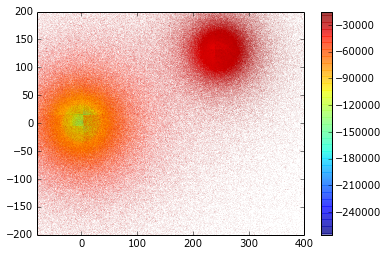

In [33]:
plt.scatter(MWLMCi_t[:,1], MWLMCi_t[:,2], s=0.1, edgecolors='none', c = MWLMCi_pot_t, alpha=0.5)
plt.axis('equal')
plt.xlim(-80, 400)
plt.ylim(-100, 100)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fdd3c925b48>

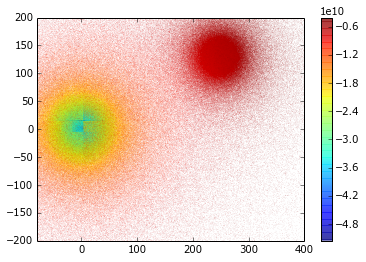

In [34]:
plt.scatter(MWLMCi_t[:,1], MWLMCi_t[:,2], s=0.1, edgecolors='none', c = MWLMCbfe_pot, alpha=0.5)
plt.axis('equal')
plt.xlim(-80, 400)
plt.ylim(-100, 100)
plt.colorbar()

In [57]:
MWLMC_norm_pot = MWLMCi_pot_t/np.max(np.abs(MWLMCi_pot_t))
MWLMCbfe_norm_pot1 = MWLMCbfe_pot/np.max(np.abs(MWLMCbfe_pot))
MWLMCratio_pot1 = MWLMC_norm_pot/MWLMCbfe_norm_pot1

<matplotlib.colorbar.Colorbar instance at 0x7fdd39c723f8>

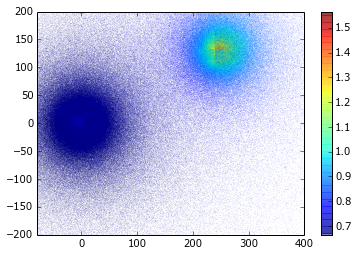

In [48]:
plt.scatter(MWLMCi_t[:,1], MWLMCi_t[:,2], s=0.1, edgecolors='none', c = MWLMCratio_pot1, alpha=0.5)
plt.axis('equal')
plt.xlim(-80, 400)
plt.ylim(-100, 100)
plt.colorbar()

In [49]:
MWLMCbfe_norm_pot2 = MWLMCbfe_pot2/np.max(np.abs(MWLMCbfe_pot2))
MWLMCratio_pot2 = MWLMC_norm_pot/MWLMCbfe_norm_pot2

<matplotlib.colorbar.Colorbar instance at 0x7fdd3737cbd8>

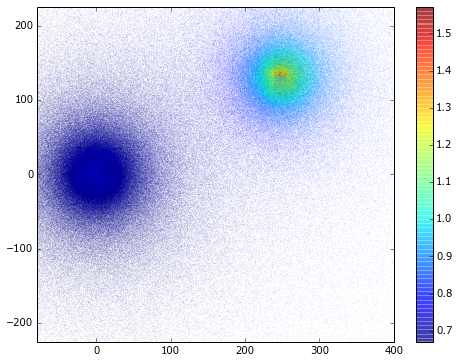

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(MWLMCi_t[:,1], MWLMCi_t[:,2], s=0.1, edgecolors='none', c = MWLMCratio_pot2, alpha=0.5)
plt.axis('equal')
plt.xlim(-80, 400)
plt.ylim(-100, 100)
plt.colorbar()

In [51]:
MWLMCbfe_norm_pot3 = MWLMCbfe_pot3/np.max(np.abs(MWLMCbfe_pot3))
MWLMCratio_pot3 = MWLMC_norm_pot/MWLMCbfe_norm_pot3

<matplotlib.colorbar.Colorbar instance at 0x7fdd55862cf8>

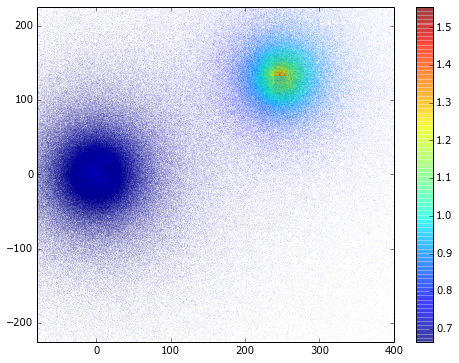

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(MWLMCi_t[:,1], MWLMCi_t[:,2], s=0.1, edgecolors='none', c = MWLMCratio_pot3, alpha=0.5)
plt.axis('equal')
plt.xlim(-80, 400)
plt.ylim(-100, 100)
plt.colorbar()

In [60]:
MWLMCbfe_norm_pot4 = MWLMCbfe_pot4/np.max(np.abs(MWLMCbfe_pot4))
MWLMCratio_pot4 = MWLMC_norm_pot/MWLMCbfe_norm_pot4

<matplotlib.colorbar.Colorbar instance at 0x7fdd474de830>

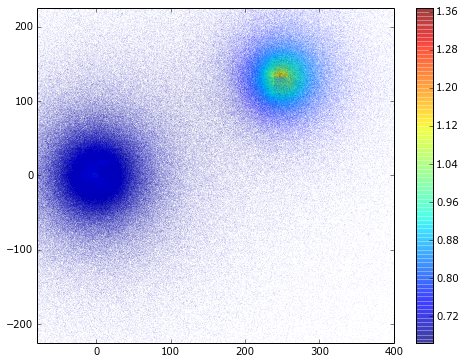

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(MWLMCi_t[:,1], MWLMCi_t[:,2], s=0.1, edgecolors='none', c = MWLMCratio_pot4, alpha=0.5)
plt.axis('equal')
plt.xlim(-80, 400)
plt.ylim(-100, 100)
plt.colorbar()